In [143]:
import pandas as pd
import numpy as np
import datetime
from utils import *
from qpmodel import *
from perform_utils import *

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [162]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
utils are imported! yeah!


In [90]:
def present_performance(allocation_dict, service_count_daily, 
                        units_to_consider = ['PCU200', 'PCU300', 'PCU360', 'PCU400', 'PCU500', 'PCU380'], 
                        cap_thresh = 0.9, 
                        over_cap_transfer = 'floor'):
    
    allocation = allocation_dict_to_dataframe(allocation_dict)
    services_to_consider = [item for l in allocation_dict.values() for item in l]
    result = cal_daily_census(allocation, service_count_daily, units_to_consider, services_to_consider)

    # plot the performance for each unit

    f = plt.figure(figsize=(20,16))
    off_unit_days = {}
    for i in range(len(units_to_consider)):
        unit = units_to_consider[i]
        ax = f.add_subplot(3, 2, i+1)
        ax.plot(result[unit])
        ax.axhline(y=unit_cap_dict[unit], color='r', linestyle='-')
        ax.axhline(y=unit_cap_dict[unit]*0.9, color='g', linestyle='-')
        off_unit_days[unit] = cal_off_cap(result, unit, unit_cap_dict, cap_thresh, over_cap_transfer)
        ax.title.set_text(unit)
        ax.grid()

    print('----off-service-stats----')
    print('[over_90%_cap_days, over_full_cap_days]')
    over_cap_count = 0
    over_90_count = 0
    for key in off_unit_days:
        aa, bb = off_unit_days[key]
        over_cap_count += aa
        over_90_count += bb
        print(key, off_unit_days[key])
    print('----in-total----')
    print(over_cap_count, over_90_count)

## Read Data

In [145]:
# read daily census
# read census from shared
cenceus_shared = '../Data/2019_Census_Shared.csv'
daily_shared = '../Data/2019_Daily_Census_Shared.csv'
df_census_2019_shared = pd.read_csv(cenceus_shared)
df_daily_shared = pd.read_csv(daily_shared)

# transfer date ap
df_daily_shared['Row Labels'] = pd.to_datetime(df_daily_shared['Row Labels'])
df_daily_shared = df_daily_shared.rename(columns={'Row Labels': 'Date'})
df_daily_shared = df_daily_shared.fillna(0)

In [147]:
# read unit capacity
unit_cap_dict = {'PCU200': 26,
 'PCU300': 26,
 'PCU360': 14,
 'PCU380': 0,
 'PCU400': 24,
 'PCU500': 49}

## Apply Growth

In [ ]:
GROWTH_RATE = {
'Green Team':1.4,
'Red Team':1.4,
'Neurosurgery':0.92,
'Neurology':0.92,
'Yellow Team':0.92,
# 'Pulmonary':0.92,
'General Pediatrics':1.06,
'General Surgery':0.83,
# 'Urology':3, # delete later
'Plastic Surgery':0.5 # delete later
}

In [ ]:
# when applying the 
1.2 + 1.3 = 2.5 -> 3
1.2->1 + 1.3->1 = 2 

In [ ]:
Team A -> 1.1 12 -> 12.3
Team B ->     12 -> 14.4
# round adding 

In [163]:
# df_daily_ajusted = daily_census_adjust(df_daily_shared, converter=np.floor)
df_daily_ajusted = daily_census_adjust(df_daily_shared)

In [164]:
df_daily_ajusted

,Date,Grand Total,Unknown,Anesthesia and Pain,Cardiology,General Pediatrics,General Surgery,Green Team,Gynocology & Obstetrics,HemOnc and Stem Cell,Neurology,Neurosurgery,Orthopedics,Otolaryngology (ENT),Plastic Surgery,Red Team,Transplant Surgery,Urology,Yellow Team
0,2018-09-01,87,0.0,1.0,14,10.60,6.64,7.0,0.0,24,1.84,2.76,1.0,1.0,0.5,11.2,0.0,3.0,7.36
1,2018-09-02,81,0.0,1.0,16,7.42,4.98,5.6,0.0,23,0.92,2.76,1.0,2.0,0.5,11.2,0.0,6.0,5.52
2,2018-09-03,71,0.0,0.0,13,4.24,3.32,4.2,0.0,24,0.00,2.76,2.0,0.0,0.0,15.4,0.0,0.0,6.44
3,2018-09-04,81,1.0,0.0,14,7.42,4.98,5.6,0.0,24,0.00,5.52,3.0,1.0,0.5,11.2,0.0,0.0,5.52
4,2018-09-05,90,0.0,0.0,14,13.78,4.15,8.4,0.0,24,0.00,9.20,2.0,2.0,0.5,9.8,0.0,0.0,5.52
5,2018-09-06,92,1.0,0.0,15,9.54,4.15,11.2,0.0,28,0.00,7.36,1.0,1.0,1.5,9.8,0.0,0.0,5.52
6,2018-09-07,100,1.0,0.0,16,10.60,2.49,15.4,0.0,29,0.92,7.36,2.0,1.0,0.5,11.2,0.0,6.0,6.44
7,2018-09-08,90,1.0,0.0,16,9.54,2.49,9.8,0.0,27,0.92,7.36,1.0,0.0,0.0,11.2,0.0,6.0,6.44
8,2018-09-09,87,1.0,0.0,15,9.54,3.32,11.2,0.0,24,0.92,6.44,2.0,0.0,0.0,9.8,0.0,6.0,6.44
9,2018-09-10,86,0.0,0.0,14,9.54,4.15,14.0,0.0,21,2.76,5.52,1.0,1.0,0.0,9.8,0.0,6.0,6.44


In [126]:
df_daily_shared

,Date,Grand Total,Unknown,Anesthesia and Pain,Cardiology,General Pediatrics,General Surgery,Green Team,Gynocology & Obstetrics,HemOnc and Stem Cell,Neurology,Neurosurgery,Orthopedics,Otolaryngology (ENT),Plastic Surgery,Red Team,Transplant Surgery,Urology,Yellow Team
0,2018-09-01,87,0.0,1.0,14,10,8.0,5,0.0,24,2.0,3.0,1.0,1.0,1.0,8.0,0.0,1.0,8
1,2018-09-02,81,0.0,1.0,16,7,6.0,4,0.0,23,1.0,3.0,1.0,2.0,1.0,8.0,0.0,2.0,6
2,2018-09-03,71,0.0,0.0,13,4,4.0,3,0.0,24,0.0,3.0,2.0,0.0,0.0,11.0,0.0,0.0,7
3,2018-09-04,81,1.0,0.0,14,7,6.0,4,0.0,24,0.0,6.0,3.0,1.0,1.0,8.0,0.0,0.0,6
4,2018-09-05,90,0.0,0.0,14,13,5.0,6,0.0,24,0.0,10.0,2.0,2.0,1.0,7.0,0.0,0.0,6
5,2018-09-06,92,1.0,0.0,15,9,5.0,8,0.0,28,0.0,8.0,1.0,1.0,3.0,7.0,0.0,0.0,6
6,2018-09-07,100,1.0,0.0,16,10,3.0,11,0.0,29,1.0,8.0,2.0,1.0,1.0,8.0,0.0,2.0,7
7,2018-09-08,90,1.0,0.0,16,9,3.0,7,0.0,27,1.0,8.0,1.0,0.0,0.0,8.0,0.0,2.0,7
8,2018-09-09,87,1.0,0.0,15,9,4.0,8,0.0,24,1.0,7.0,2.0,0.0,0.0,7.0,0.0,2.0,7
9,2018-09-10,86,0.0,0.0,14,9,5.0,10,0.0,21,3.0,6.0,1.0,1.0,0.0,7.0,0.0,2.0,7


## Run Optimization

In [94]:
services_to_consider = ['Cardiology',
 'Green Team',
 'Red Team',
 'Transplant Surgery',
 'Urology',
 'General Pediatrics',
 'Plastic Surgery',
 'Yellow Team',
 'Neurosurgery',
 'Neurology',
 'Otolaryngology (ENT)',
 'Orthopedics',
 'HemOnc and Stem Cell',
 'General Surgery']

units_to_consider = ['PCU200', 'PCU300', 'PCU360', 'PCU400', 'PCU500', 'PCU380']

In [139]:
# allocation = constrained_piecewise(services_to_consider, units_to_consider, df_daily_ajusted,
#                     unit_cap_dict, cap_thresh = 0.95)
allocation = constrained_qp(services_to_consider, units_to_consider, df_daily_ajusted,
                    unit_cap_dict, cap_thresh = 0.90)

Optimize a model with 23 rows, 84 columns and 93 nonzeros
Model has 630 quadratic objective terms
Variable types: 0 continuous, 84 integer (84 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 9e+05]
  QObjective range [2e+02, 6e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 359800.45000
Presolve removed 17 rows and 49 columns
Presolve time: 0.00s
Presolved: 91 rows, 120 columns, 290 nonzeros
Variable types: 0 continuous, 120 integer (120 binary)
Found heuristic solution: objective 95658.450000

Root relaxation: objective 8.498478e+04, 52 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 84984.7833    0   15 95658.4500 84984.7833  11.2%     -    0s
H    0     0                    90954.850000 84984.7833  6.56%     -    0s
H    0     0           

In [140]:
allocation = allocation_to_dict(allocation, units_to_consider, services_to_consider)

In [141]:
allocation

{'PCU200': ['Cardiology', 'Otolaryngology (ENT)'],
 'PCU300': ['Green Team', 'Red Team', 'Transplant Surgery'],
 'PCU360': ['Plastic Surgery', 'General Surgery'],
 'PCU400': ['Urology',
  'Yellow Team',
  'Neurosurgery',
  'Neurology',
  'Orthopedics'],
 'PCU500': ['General Pediatrics', 'HemOnc and Stem Cell']}

----off-service-stats----
[over_90%_cap_days, over_full_cap_days]
PCU200 [21, 4]
PCU300 [68, 34]
PCU360 [6, 0]
PCU400 [36, 3]
PCU500 [180, 38]
----in-total----
311 79


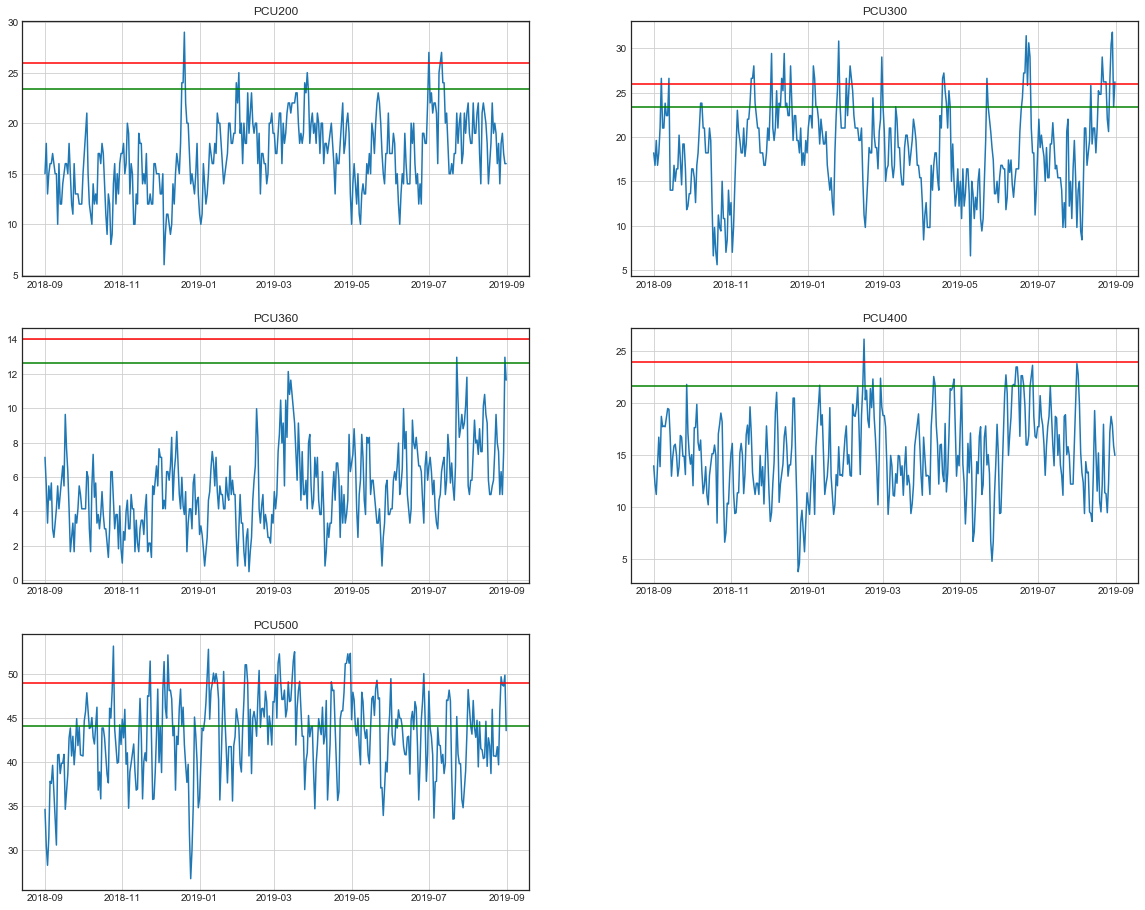

In [153]:
present_performance(allocation, df_daily_ajusted, 
                        units_to_consider = ['PCU200', 'PCU300', 'PCU360', 'PCU400', 'PCU500'], 
                        cap_thresh = 0.9, 
                        over_cap_transfer = 'floor')

## Check Result

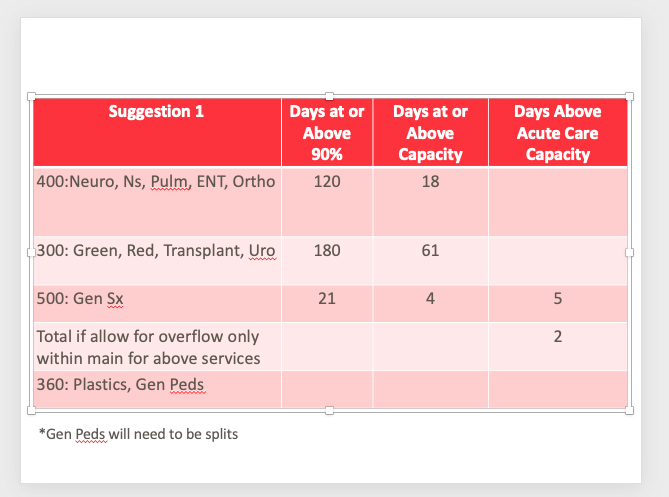

In [ ]:
PCU200 [1, 0]
PCU300 [134, 72]
PCU360 [331, 280]
PCU400 [64, 20]
PCU500 [4, 0]
PCU380 [365, 365]

----off-service-stats----
[over_90%_cap_days, over_full_cap_days]
PCU200 [1, 0]
PCU300 [134, 72]
PCU360 [331, 280]
PCU400 [64, 20]
PCU500 [4, 0]
PCU380 [365, 365]
----in-total----
899 737


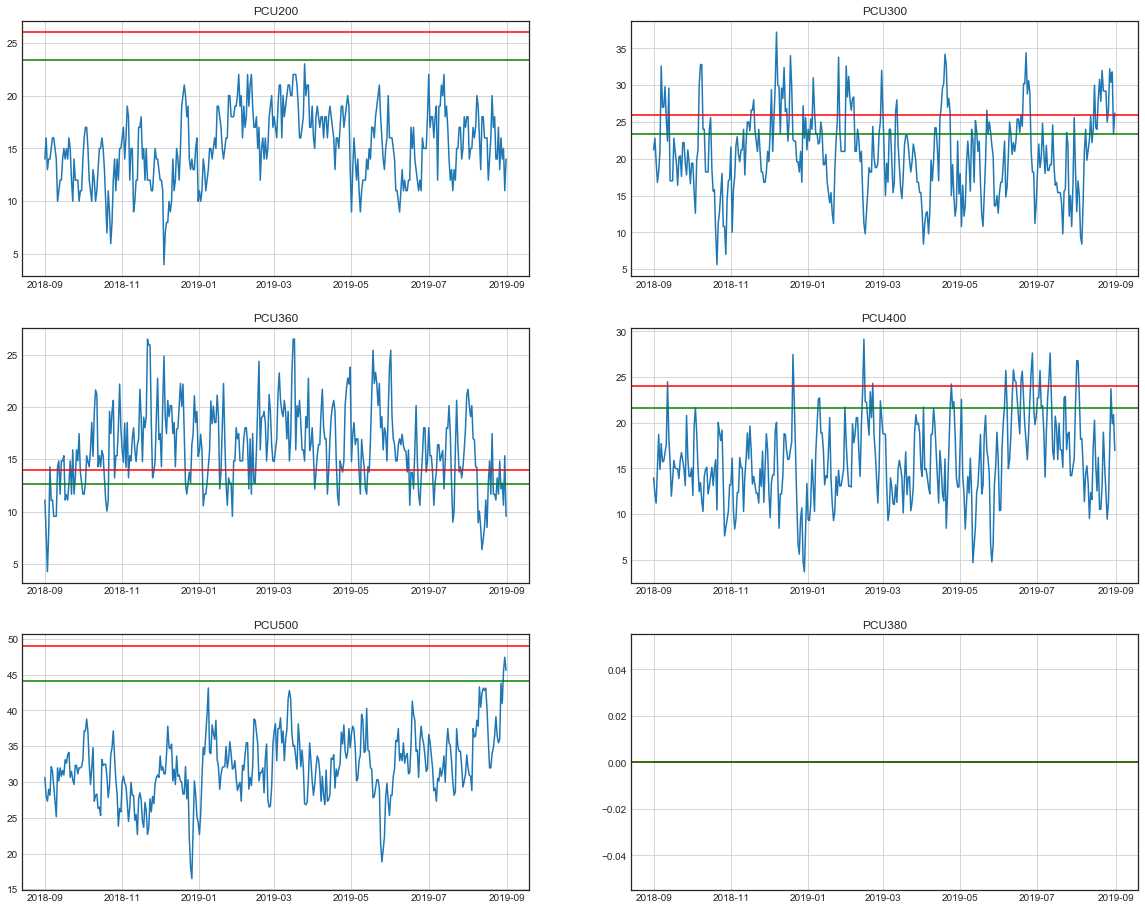

In [175]:
# suugestion 1 in slides
allocation_dict = {
'PCU200': ['Cardiology'],
 'PCU300': ['Green Team',
  'Red Team',
  'Transplant Surgery', 
  'Urology'],
 'PCU360': ['General Pediatrics', 'Plastic Surgery'],
 'PCU400': ['Yellow Team',
  'Neurosurgery',
  'Neurology',
  'Otolaryngology (ENT)',
  'Orthopedics'],
 'PCU500': ['HemOnc and Stem Cell', 'General Surgery'],
 'PCU380': []
}

present_performance(allocation_dict, df_daily_ajusted, 
                        units_to_consider = ['PCU200', 'PCU300', 'PCU360', 'PCU400', 'PCU500', 'PCU380'], 
                        cap_thresh = 0.9, 
                        over_cap_transfer = 'floor')

In [156]:
allocation = allocation_dict_to_dataframe(allocation_dict)
services_to_consider = [item for l in allocation_dict.values() for item in l]
result = cal_daily_census(allocation, service_count_daily, units_to_consider, services_to_consider)

# plot the performance for each unit

f = plt.figure(figsize=(20,16))
off_unit_days = {}
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
#     ax = f.add_subplot(3, 2, i+1)
#     ax.plot(result[unit])
#     ax.axhline(y=unit_cap_dict[unit], color='r', linestyle='-')
#     ax.axhline(y=unit_cap_dict[unit]*0.9, color='g', linestyle='-')
    off_unit_days[unit] = cal_off_cap(result, unit, unit_cap_dict, cap_thresh, over_cap_transfer)
#     ax.title.set_text(unit)
#     ax.grid()

print('----off-service-stats----')
print('[over_90%_cap_days, over_full_cap_days]')
over_cap_count = 0
over_90_count = 0
for key in off_unit_days:
    aa, bb = off_unit_days[key]
    over_cap_count += aa
    over_90_count += bb
    print(key, off_unit_days[key])
print('----in-total----')
print(over_cap_count, over_90_count)

----off-service-stats----
[over_90%_cap_days, over_full_cap_days]
PCU200 [1, 0]
PCU300 [159, 87]
PCU360 [340, 289]
PCU400 [82, 37]
PCU500 [8, 0]
PCU380 [365, 365]
----in-total----
955 778


<Figure size 1440x1152 with 0 Axes>

In [166]:
left_opt1 = pd.read_csv('../Data/Option_1.csv')

In [ ]:
# read unit capacity
unit_cap_dict = {'PCU200': 26,
 'PCU300': 26,
 'PCU360': 14,
 'PCU380': 0,
 'PCU400': 24,
 'PCU500': 49}

In [183]:
24*0.9

21.6

In [192]:
left_opt1.loc[24 - left_opt1['400'] >= 21].shape

(52, 5)

In [190]:
left_opt1.loc[left_opt1['400'] <= 3].shape

(52, 5)

In [161]:
result_remain = result.copy()
unit_cap_dict
for unit in unit_cap_dict:
    result_remain[unit] = unit_cap_dict[unit] - result[unit]
result_remain

,PCU200,PCU300,PCU360,PCU400,PCU500,PCU380
Date,,,,,,
2018-09-01,12.0,4.0,2.0,9.0,18.0,0.0
2018-09-02,10.0,2.0,5.0,11.0,21.0,0.0
2018-09-03,13.0,5.0,9.0,12.0,21.0,0.0
2018-09-04,12.0,8.0,5.0,8.0,20.0,0.0
2018-09-05,12.0,7.0,-1.0,4.0,20.0,0.0
2018-09-06,11.0,4.0,2.0,8.0,16.0,0.0
2018-09-07,10.0,-8.0,2.0,5.0,17.0,0.0
2018-09-08,10.0,-2.0,4.0,7.0,19.0,0.0
2018-09-09,11.0,-2.0,4.0,7.0,21.0,0.0
